In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from acquire import *
from prepare import *
from explore import *

In [ ]:
# Create a pandas dataframe, df_iris, from this data.

df = data("iris")

#     print the first 3 rows

print(df.head(3), "\n")

#     print the number of rows and columns (shape)

print("Shape of the dataframe is", df.shape, ".\n")

#     print the column names
#     print the data type of each column

print(df.info(), "\n")

#     print the summary statistics for each of the numeric variables

print(df.describe())

In [ ]:
 # Read the data from the provided google sheet into a dataframe, df_google.

csv_file1 = "train.csv"
df_google = pd.read_csv(csv_file1)

    # print the first 3 rows

print(df_google.head(3), "\n")

    # print the number of rows and columns

print(df_google.shape, "\n")

    # print the column names
    # print the data type of each column

print(df_google.info(), "\n")

    # print the summary statistics for each of the numeric variables

print(df_google.describe(), "\n")

    # print the unique values for each of your categorical variables

print(df_google.value_counts())

In [ ]:
# Download the previous exercise's file into an excel (File → Download → 
# Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

xl_file1 = "train.xlsx"
df_excel = pd.read_excel(xl_file1)

    # assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = df_excel[:101]

    # print the number of rows of your original dataframe

print(df_excel.shape, "\n")

    # print the first 5 column names

print(df_excel.columns[:5].to_list(), "\n")

    # print the column names that have a data type of object

print(df_excel.select_dtypes(include = ["object"]).columns.to_list(), "\n")

    # compute the range for each of the numeric variables.

print((df_excel.select_dtypes(include = ["float"]).max()) - (df_excel.select_dtypes(include = ["float"]).min()) )


In [ ]:
df = get_iris_data()
# df = df.drop(columns=["species_id", "measurement_id"])
# df = df.rename(columns={"species_name": "species"})
# dummy_df = pd.get_dummies(df[["species"]], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)

prep_iris(df)

df.head()

In [ ]:
df = get_telco_data()
# df = df.drop(columns = ["contract_type", "payment_type",
#                        "internet_service_type"])
# dummy_df = pd.get_dummies(df[["gender"]], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)

prep_telco(df)

df.head()

In [ ]:
df = get_titanic_data()
# titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
# dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
# titanic = pd.concat([titanic, dummy_df], axis=1)
prep_tit(df)

df.head()

In [ ]:
df = new_attendance_df()

df = df.melt(id_vars = "Unnamed", var_name = "date", value_name = "attend")
df.attend = df.attend.map({"P":1, "H":.5, "A":0, "T":.9}) #Tardies policy needed MAJOR clarification.
df.groupby("Unnamed").mean()

df.head(3)

In [ ]:
df = new_coffee_df()
df = df.pivot_table(index = "hour", columns = "coffee_carafe")

df.head(3)

In [ ]:
df = new_cake_df()
df = df.melt(id_vars = "recipe : position", var_name = "temp",
             value_name = "score")
df[["recipe", "position"]] = df["recipe : position"].str.split(":", expand = True)
df = df.drop(columns="recipe : position")
df = df.groupby(["recipe", "position", "temp"]).mean()

df

In [ ]:
train, validate, test = prep_split(prep_iris(new_iris_df()), "species")

display(train.describe().transpose())

cat_analysis(train, "species", "sepal_length")

In [ ]:
train, validate, test = prep_split(prep_tit(new_tit_df()), "pclass")

display(train.describe().transpose())

cat_analysis(train, "pclass", "survived")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,4225,4225,4098-NAUKP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,4225,2,Male,2144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,4225.0,NaN,NaN,NaN,0.165917,0.37205,0.0,0.0,0.0,0.0,1.0
partner,4225,2,No,2166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,4225,2,No,2927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,4225.0,NaN,NaN,NaN,32.121893,24.498996,0.0,8.0,28.0,55.0,72.0
phone_service,4225,2,Yes,3842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiple_lines,4225,3,No,2058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_security,4225,3,No,2101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_backup,4225,3,No,1838,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We fail to reject the null hypothesis that gender and churn are independent.
There appears to be no relationship between  churn and  gender .
We reject the null hypothesis that senior_citizen and churn are independent.
There appears to be a relationship between churn and senior_citizen.
We reject the null hypothesis that partner and churn are independent.
There appears to be a relationship between churn and partner.
We reject the null hypothesis that dependents and churn are independent.
There appears to be a relationship between churn and dependents.
We reject the null hypothesis that tenure and churn are independent.
There appears to be a relationship between churn and tenure.
We fail to reject the null hypothesis that phone_service and churn are independent.
There appears to be no relationship between  churn and  phone_service .
We reject the null hypothesis that multiple_lines and churn are independent.
There appears to be a relationship between churn and multiple_lines.
We reject 

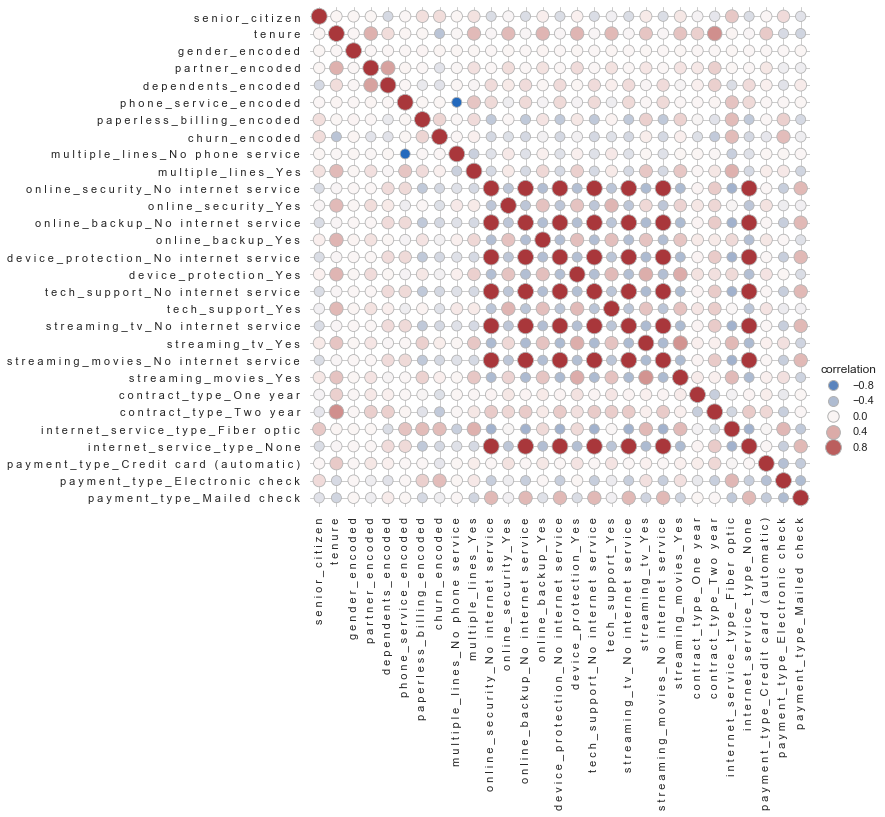

In [2]:
train, validate, test = prep_split(prep_telco(get_telco_data()), "churn")

display(train.describe(include = "all").transpose())

num_type_list, cat_type_list = dtypes_to_list(train)
cat_type_list = cat_type_list[1:]
cat_analysis(train, "churn", cat_type_list)